# Load Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
automobile = fetch_ucirepo(id=10)
data = automobile.data.features

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Exploratory Data Analysis

Summary

In [ ]:
data.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [ ]:
data.shape

(205, 25)

In [ ]:
initial_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

Missing values

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
price,4
highway-mpg,0
city-mpg,0
peak-rpm,2
horsepower,2
compression-ratio,0
stroke,4
bore,4
fuel-system,0
engine-size,0


Missing data heatmap

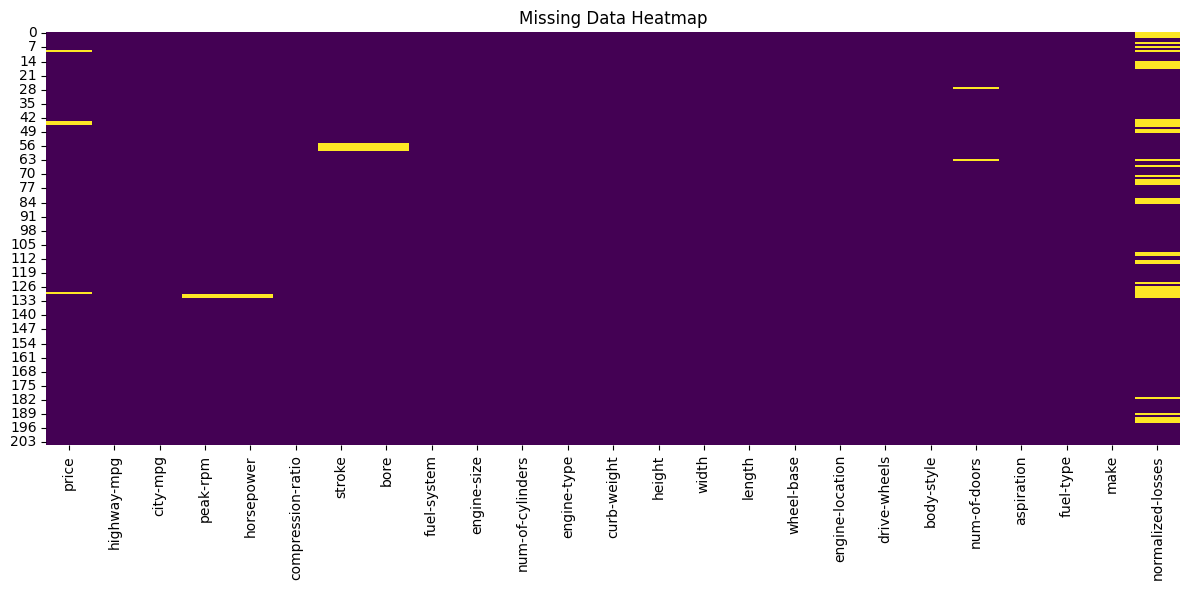

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

Select and separately store Numerical and Categorical features in different variables

In [ ]:
numerical_data = data.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 17 numerical features: 

['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size', 'num-of-cylinders', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'num-of-doors', 'normalized-losses']


In [ ]:
categorical_data = data.select_dtypes(include= 'object')
categorical_features = categorical_data.columns.tolist()
print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 8 numerical features: 

['fuel-system', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make']


Descriptive analysis

In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,201.0,13207.129353,7947.066342,5118.00,7775.00,10295.00,16500.00,45400.00
highway-mpg,205.0,30.751220,6.886443,16.00,25.00,30.00,34.00,54.00
city-mpg,205.0,25.219512,6.542142,13.00,19.00,24.00,30.00,49.00
peak-rpm,203.0,5125.369458,479.334560,4150.00,4800.00,5200.00,5500.00,6600.00
horsepower,203.0,104.256158,39.714369,48.00,70.00,95.00,116.00,288.00
compression-ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
num-of-cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00


In [ ]:
categorical_data.describe().T

,count,unique,top,freq
fuel-system,205,8,mpfi,94
engine-type,205,7,ohc,148
engine-location,205,2,front,202
drive-wheels,205,3,fwd,120
body-style,205,5,sedan,96
aspiration,205,2,std,168
fuel-type,205,2,gas,185
make,205,22,toyota,32


Histograms and box plot

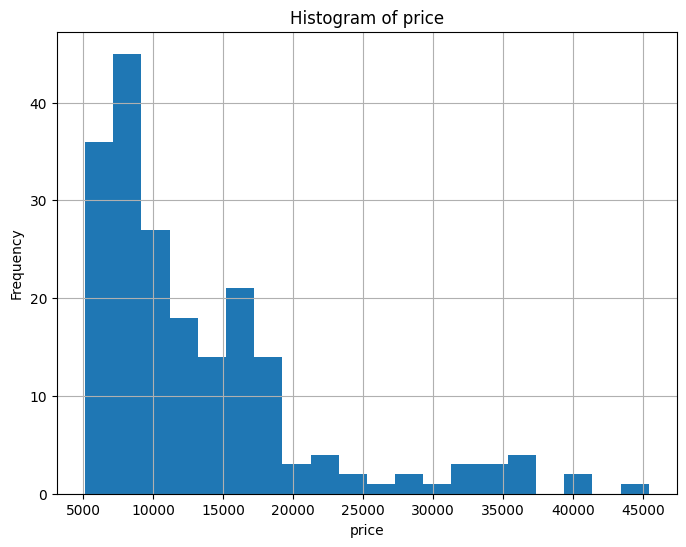

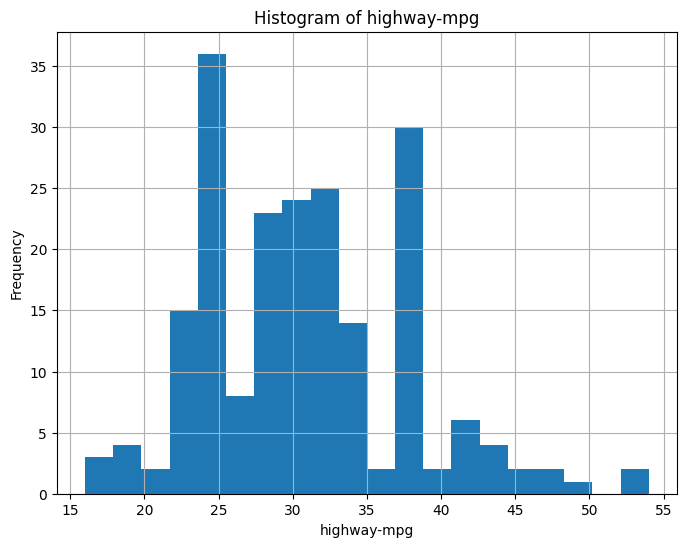

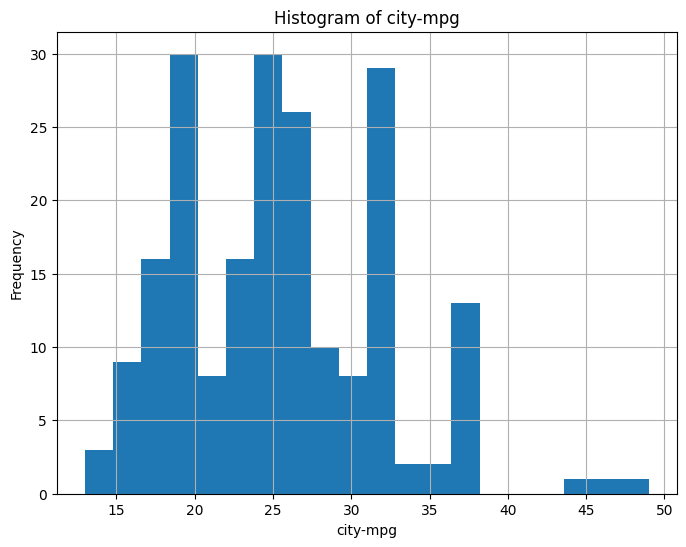

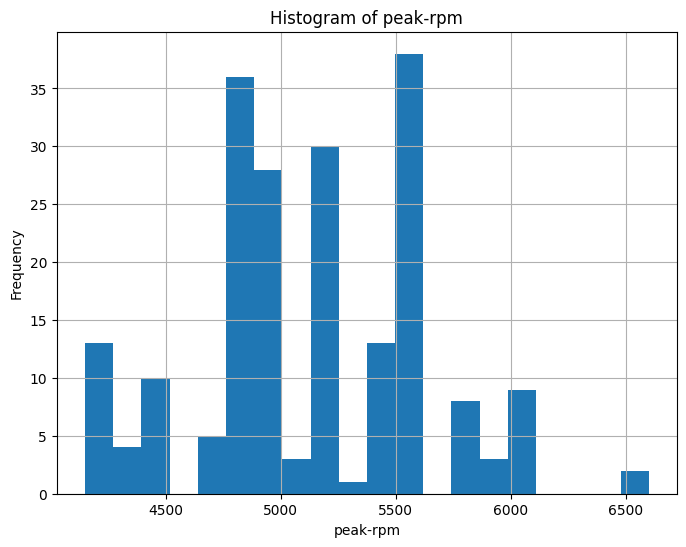

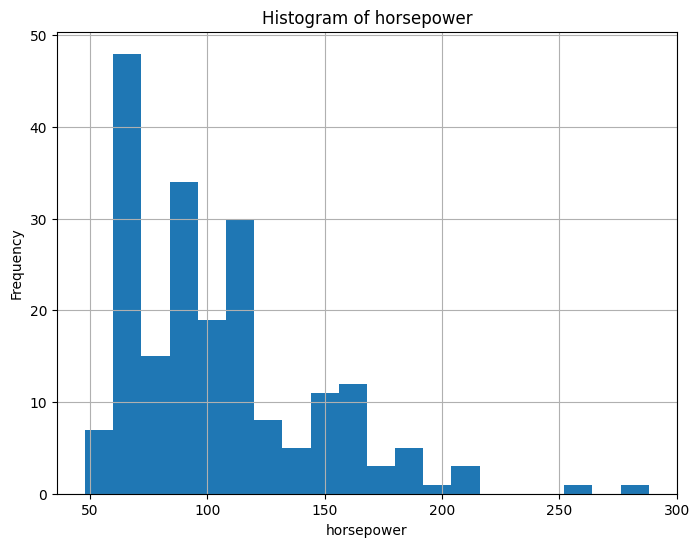

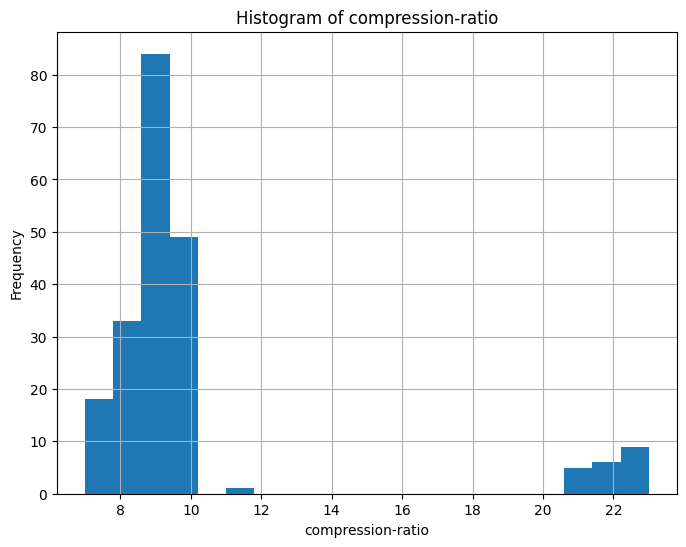

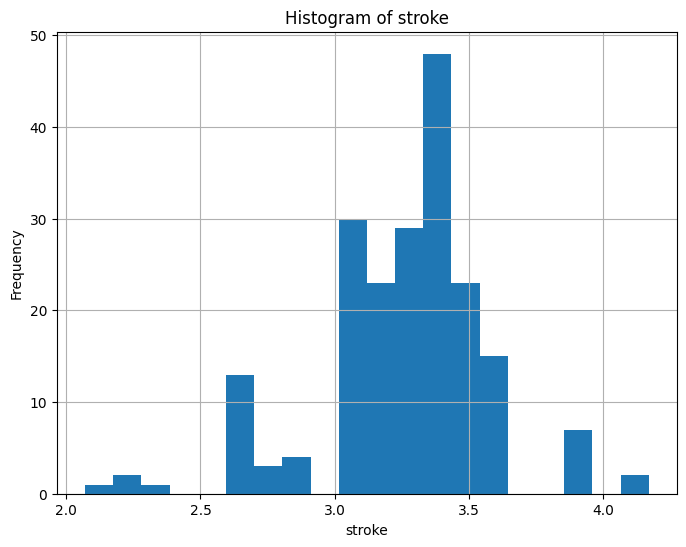

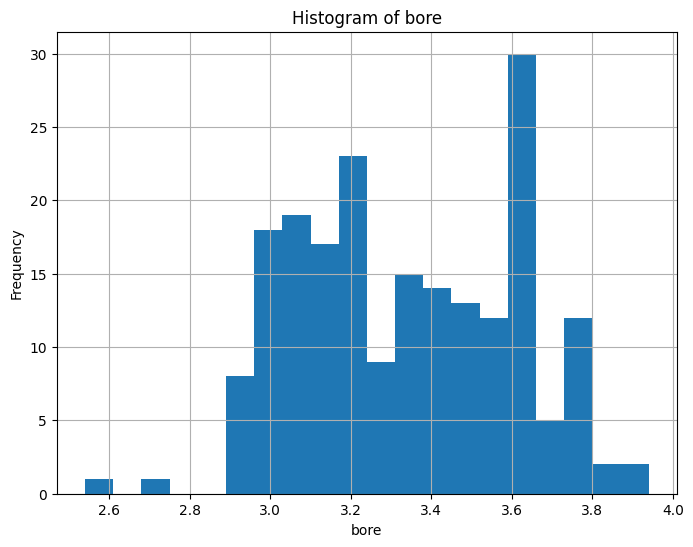

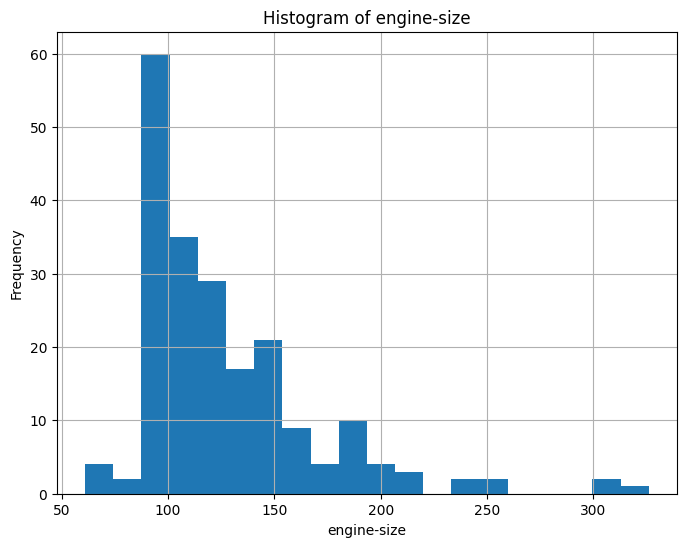

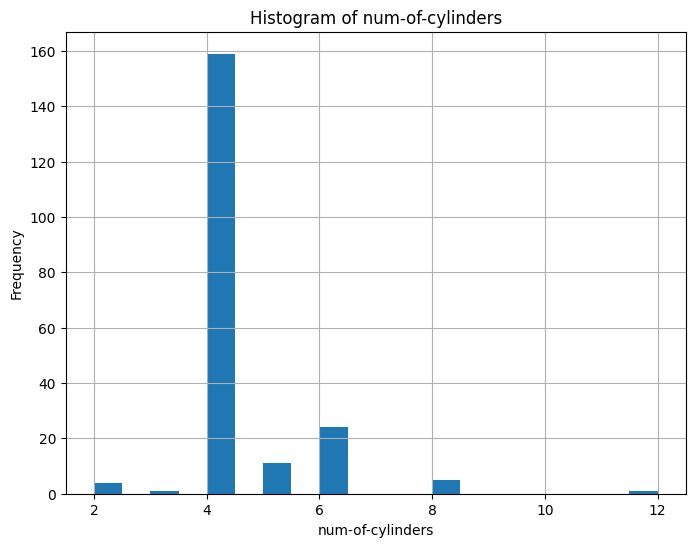

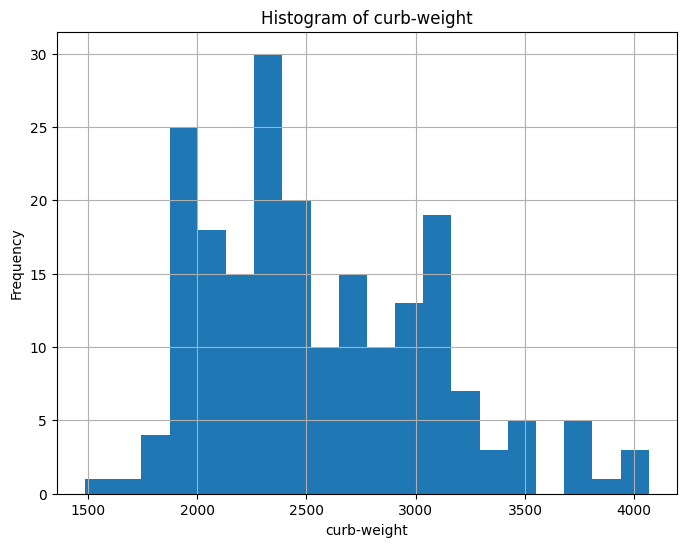

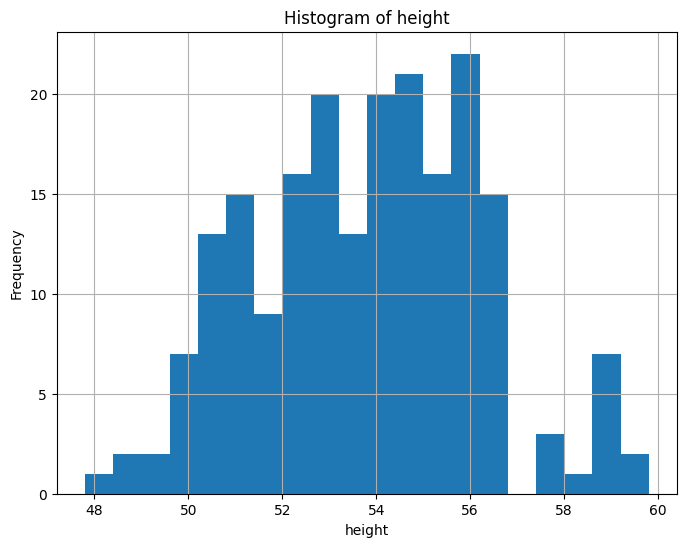

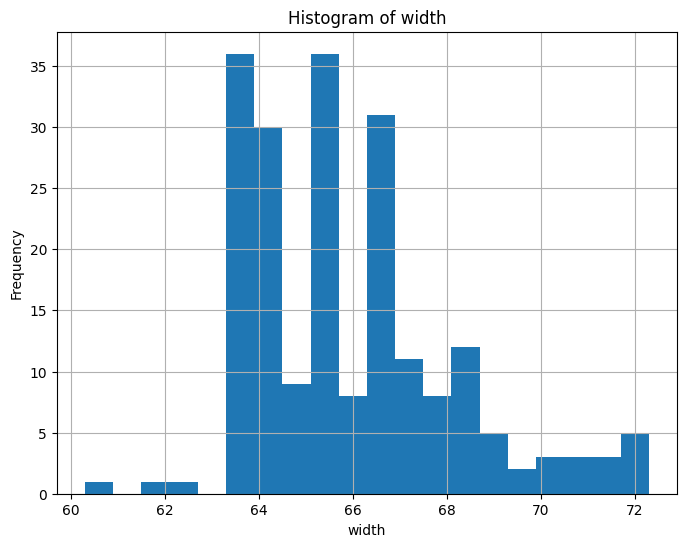

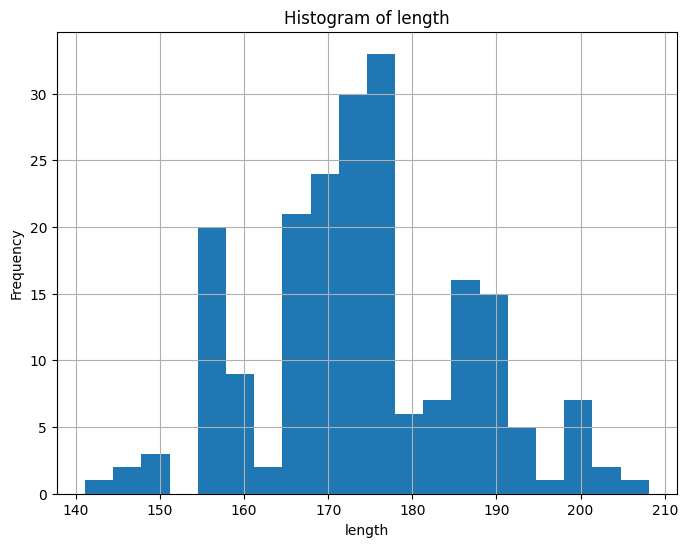

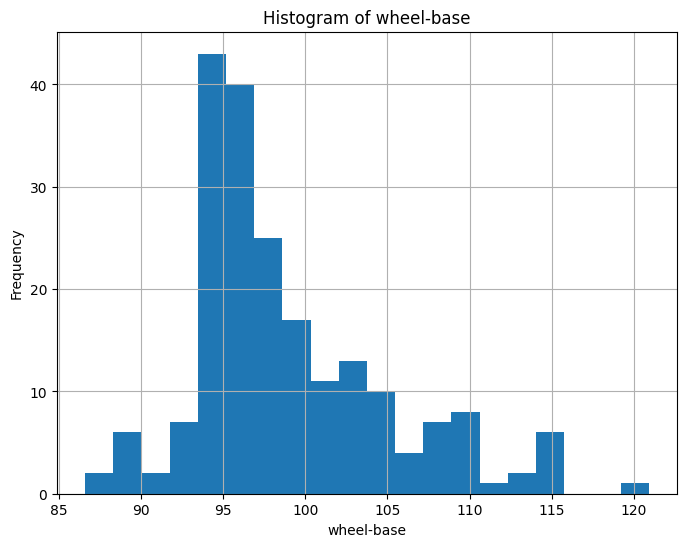

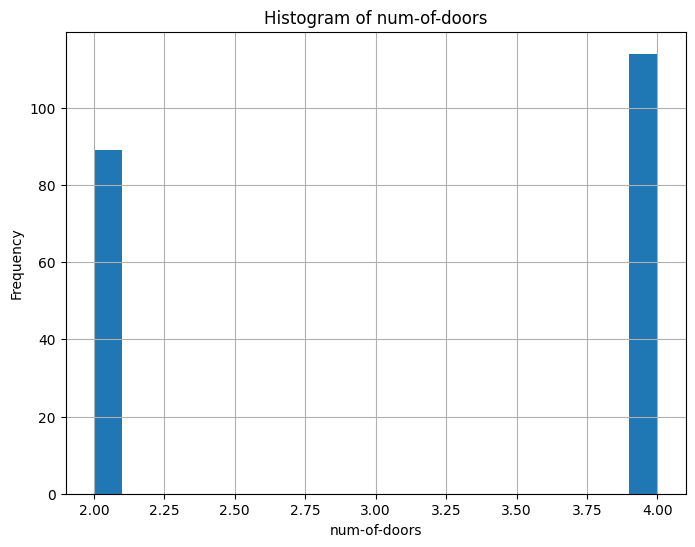

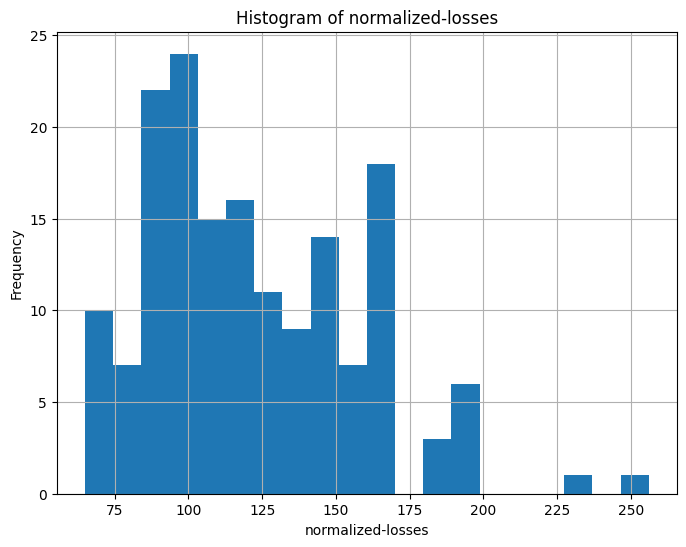

In [ ]:
for col in numerical_data.columns:
  plt.figure(figsize=(8, 6))
  numerical_data[col].hist(bins=20)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

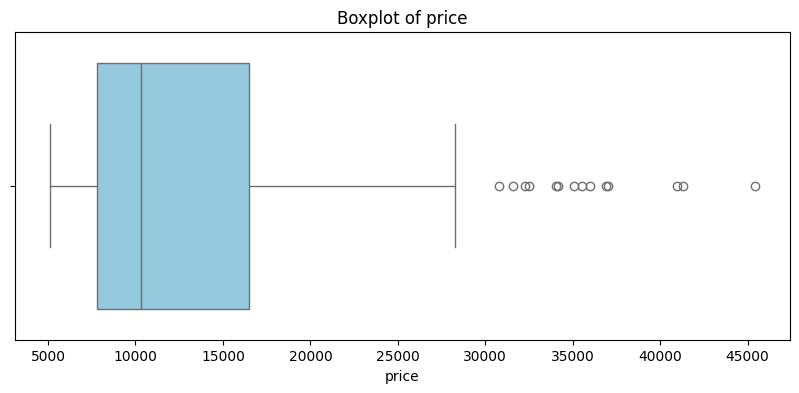

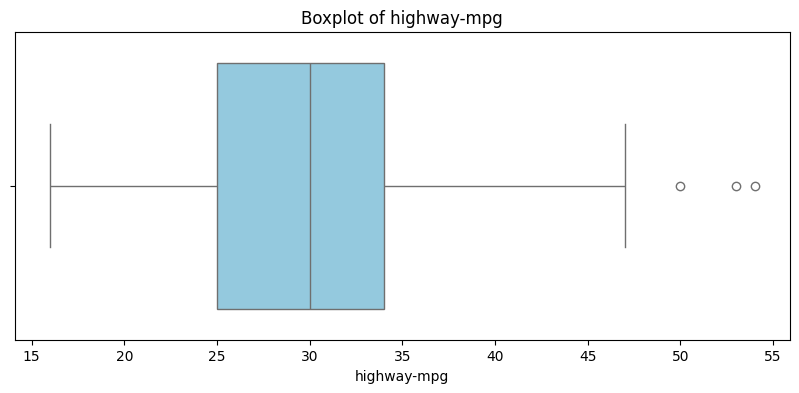

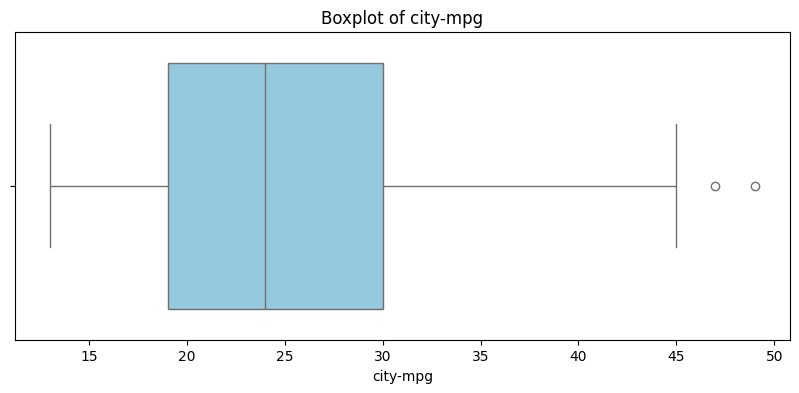

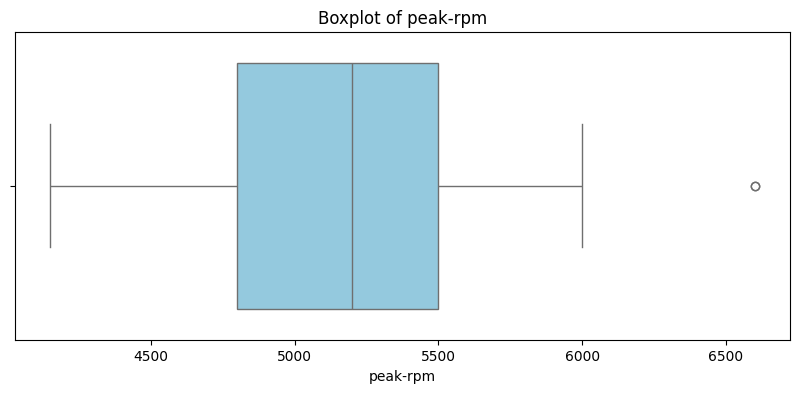

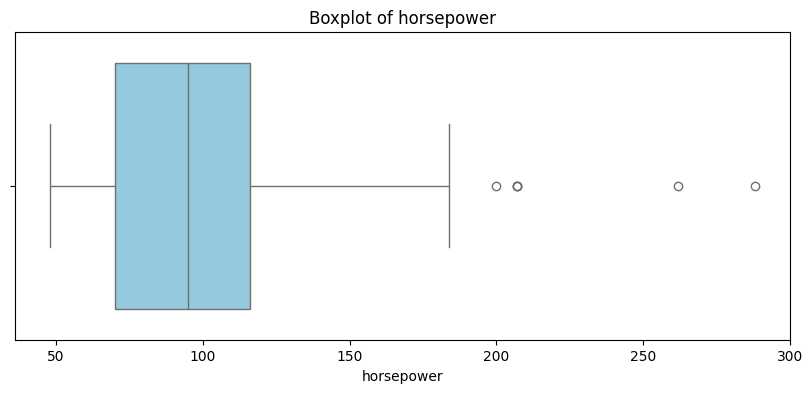

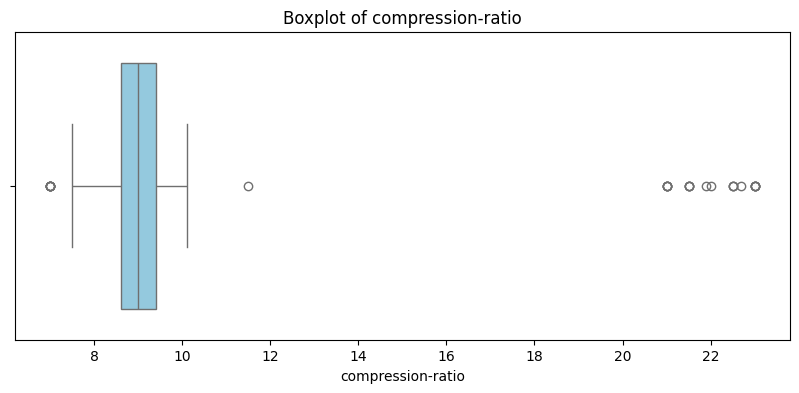

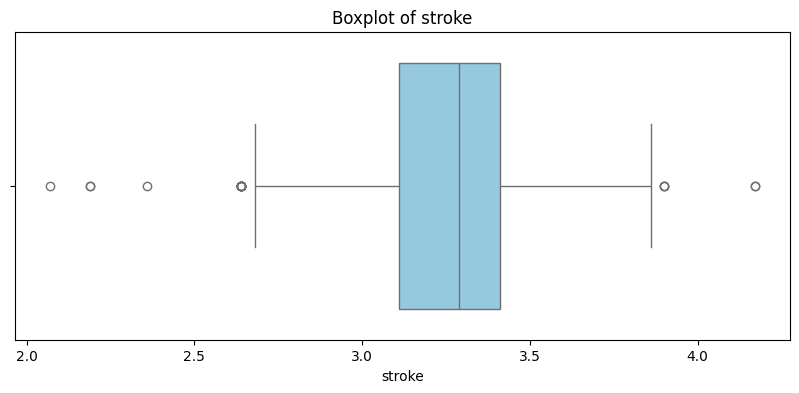

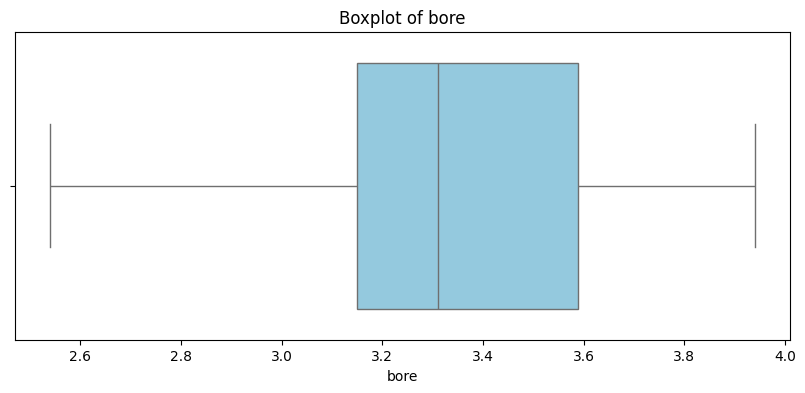

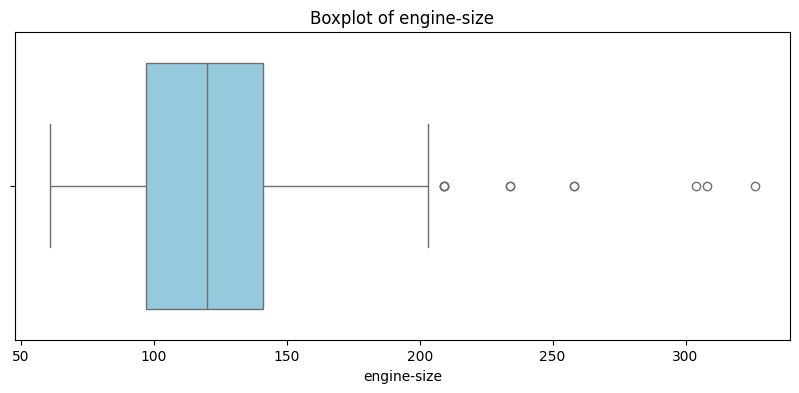

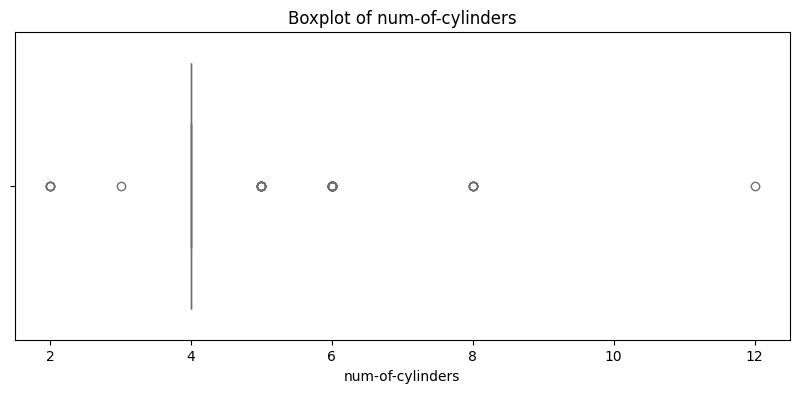

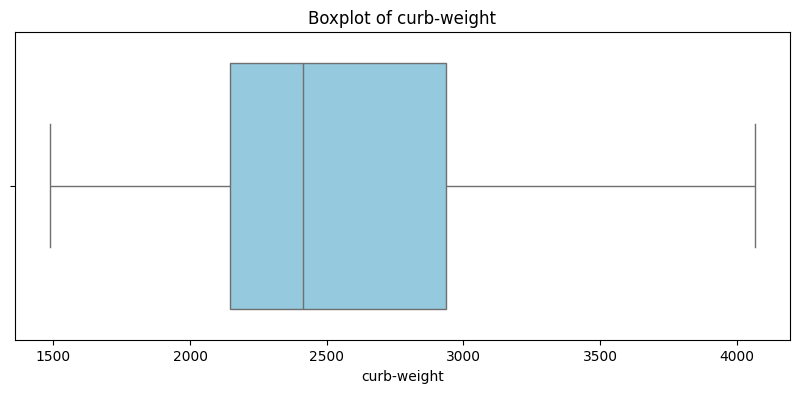

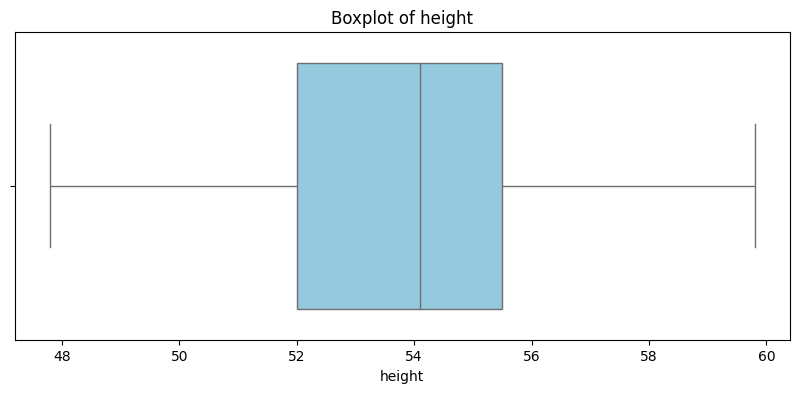

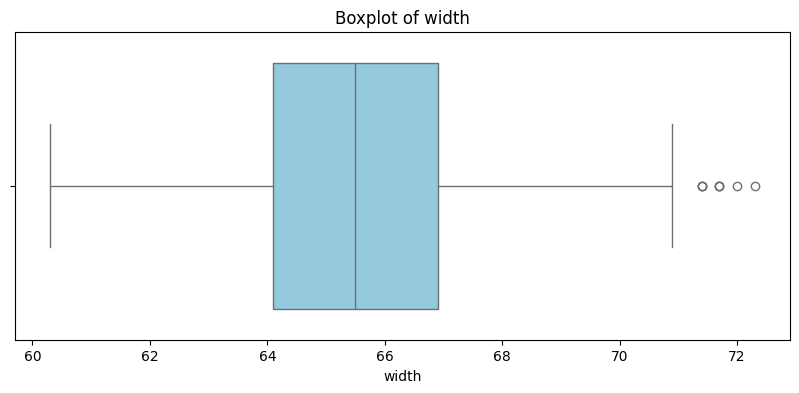

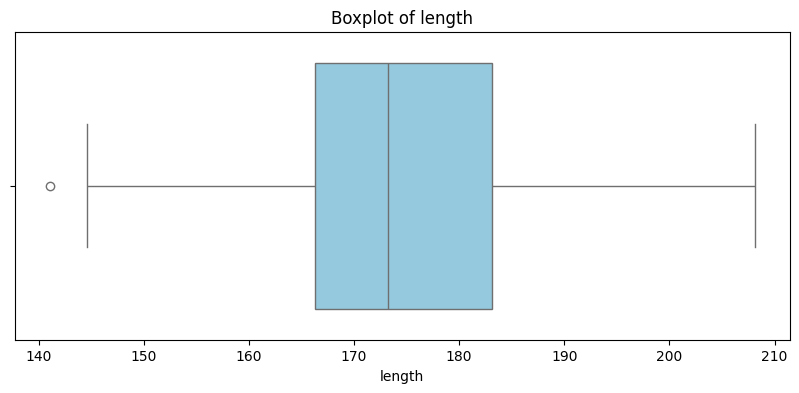

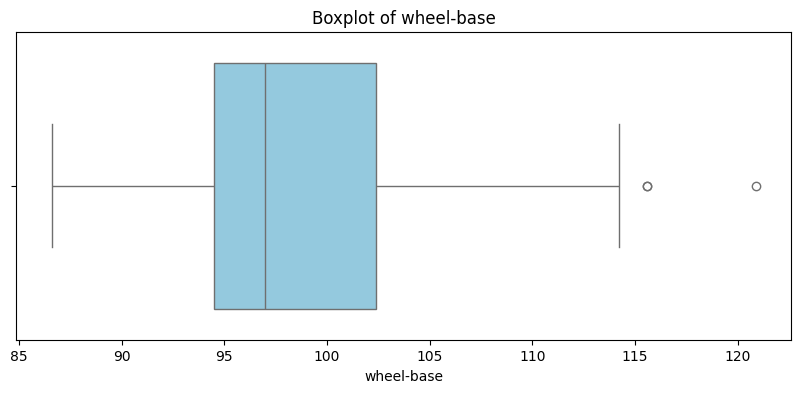

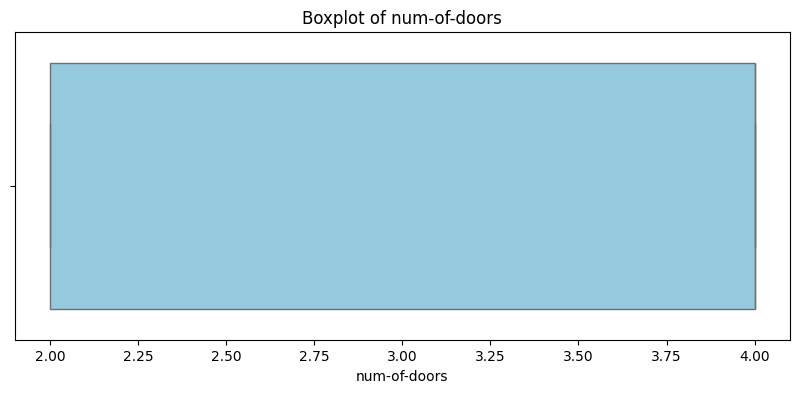

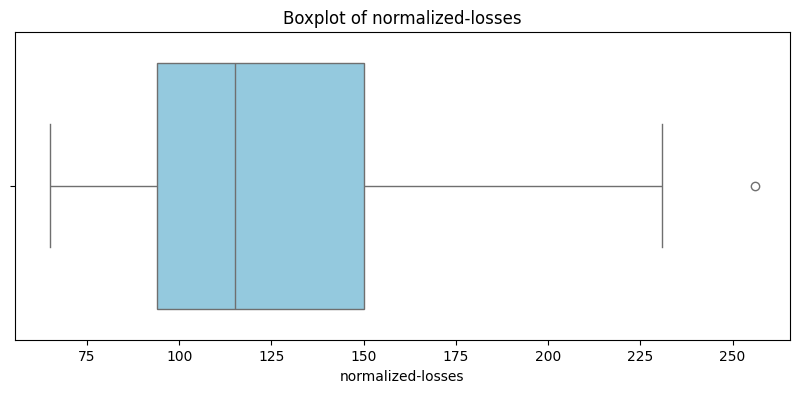

In [ ]:
for col in numerical_data.columns:
  plt.figure(figsize=(10, 4)) # Adjust figure size as needed
  sns.boxplot(x=data[col], color='skyblue')
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()

No of unique values in each categorical feature

In [ ]:
unique_counts = categorical_data.nunique()
unique_counts

,0
fuel-system,8
engine-type,7
engine-location,2
drive-wheels,3
body-style,5
aspiration,2
fuel-type,2
make,22


Barplot of unique value counts in every categorical features

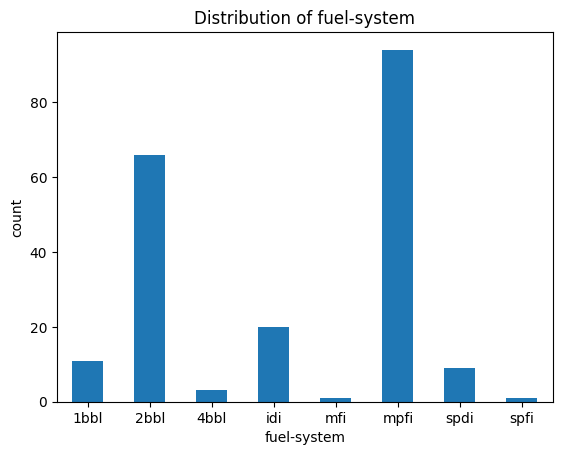

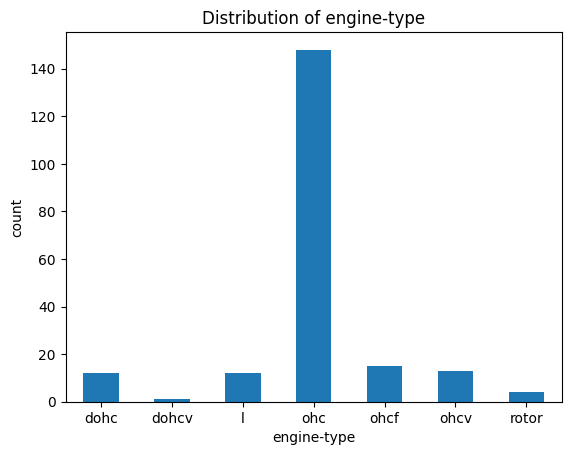

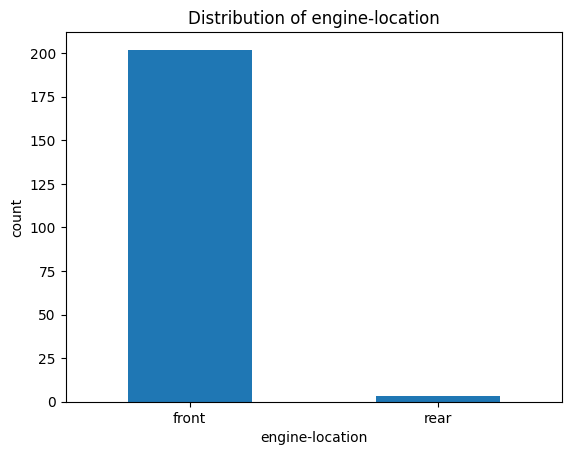

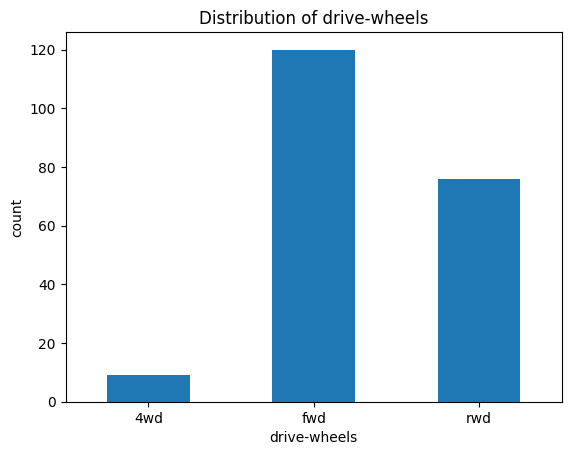

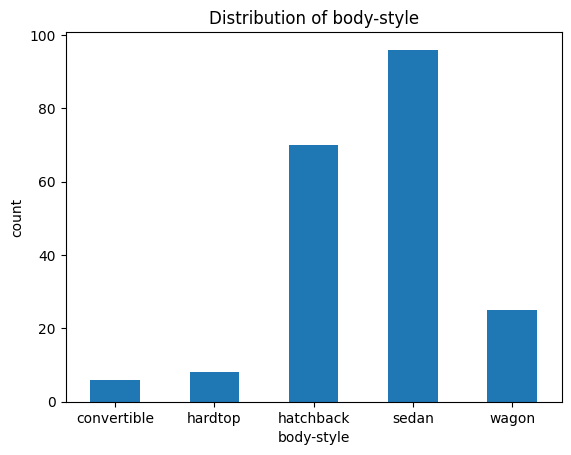

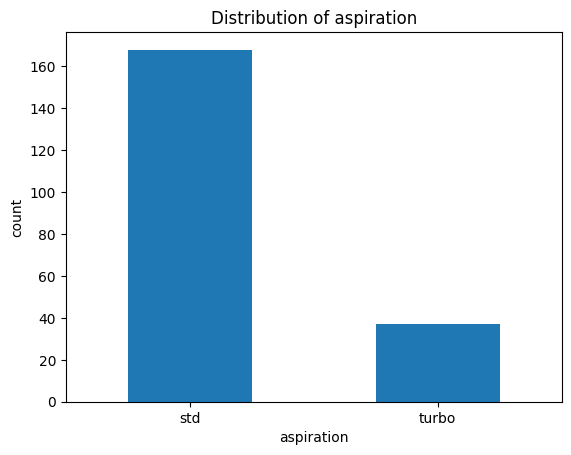

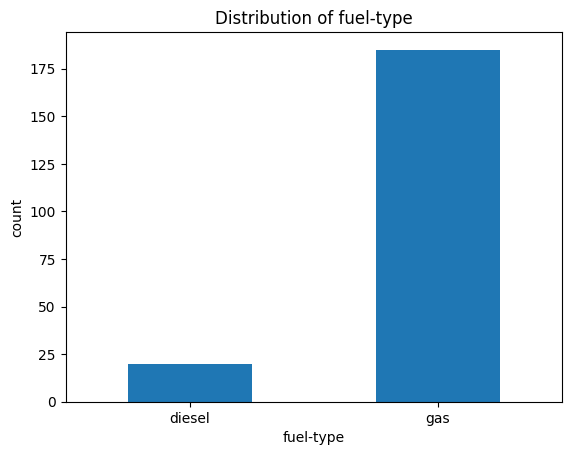

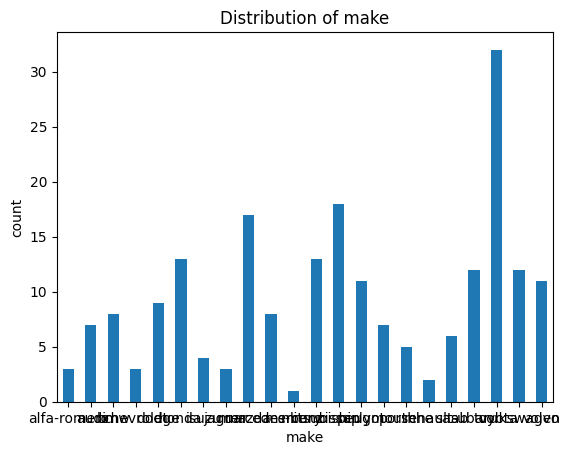

In [ ]:
for col in categorical_features:
  plt.title(f'Distribution of {col}')
  categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
  plt.show()

Correlation Heatmap plot of whole dataset

In [ ]:
correlation_matrix = numerical_data.corr()
correlation_matrix

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
price,1.000000,-0.704692,-0.686571,-0.101649,0.810533,0.071107,0.082310,0.543436,0.872335,0.708645,0.834415,0.135486,0.751265,0.690628,0.584642,0.046532,0.203254
highway-mpg,-0.704692,1.000000,0.971337,-0.054257,-0.770908,0.265201,-0.044528,-0.594572,-0.677470,-0.466666,-0.797465,-0.107358,-0.677218,-0.704662,-0.544082,-0.044507,-0.210768
city-mpg,-0.686571,0.971337,1.000000,-0.113788,-0.803620,0.324701,-0.042906,-0.594584,-0.653658,-0.445837,-0.757414,-0.048640,-0.642704,-0.670909,-0.470414,-0.020812,-0.258502
peak-rpm,-0.101649,-0.054257,-0.113788,1.000000,0.130971,-0.436221,-0.071493,-0.264269,-0.244618,-0.124434,-0.266306,-0.322272,-0.219957,-0.287325,-0.361052,-0.242485,0.264597
horsepower,0.810533,-0.770908,-0.803620,0.130971,1.000000,-0.205874,0.090254,0.577273,0.810773,0.691633,0.751034,-0.110711,0.642482,0.555003,0.352297,-0.124963,0.295772
compression-ratio,0.071107,0.265201,0.324701,-0.436221,-0.205874,1.000000,0.186170,0.005203,0.028971,-0.020002,0.151362,0.261214,0.181129,0.158414,0.249786,0.165799,-0.132654
stroke,0.082310,-0.044528,-0.042906,-0.071493,0.090254,0.186170,1.000000,-0.055909,0.206675,0.008578,0.168929,-0.056999,0.182956,0.129739,0.161477,-0.010697,0.065627
bore,0.543436,-0.594572,-0.594584,-0.264269,0.577273,0.005203,-0.055909,1.000000,0.594090,0.243553,0.649045,0.176195,0.559204,0.607480,0.490378,0.114501,-0.036167
engine-size,0.872335,-0.677470,-0.653658,-0.244618,0.810773,0.028971,0.206675,0.594090,1.000000,0.846031,0.850594,0.067149,0.735433,0.683360,0.569329,0.017519,0.167365
num-of-cylinders,0.708645,-0.466666,-0.445837,-0.124434,0.691633,-0.020002,0.008578,0.243553,0.846031,1.000000,0.609727,-0.013995,0.545007,0.430672,0.339507,-0.016530,0.175380


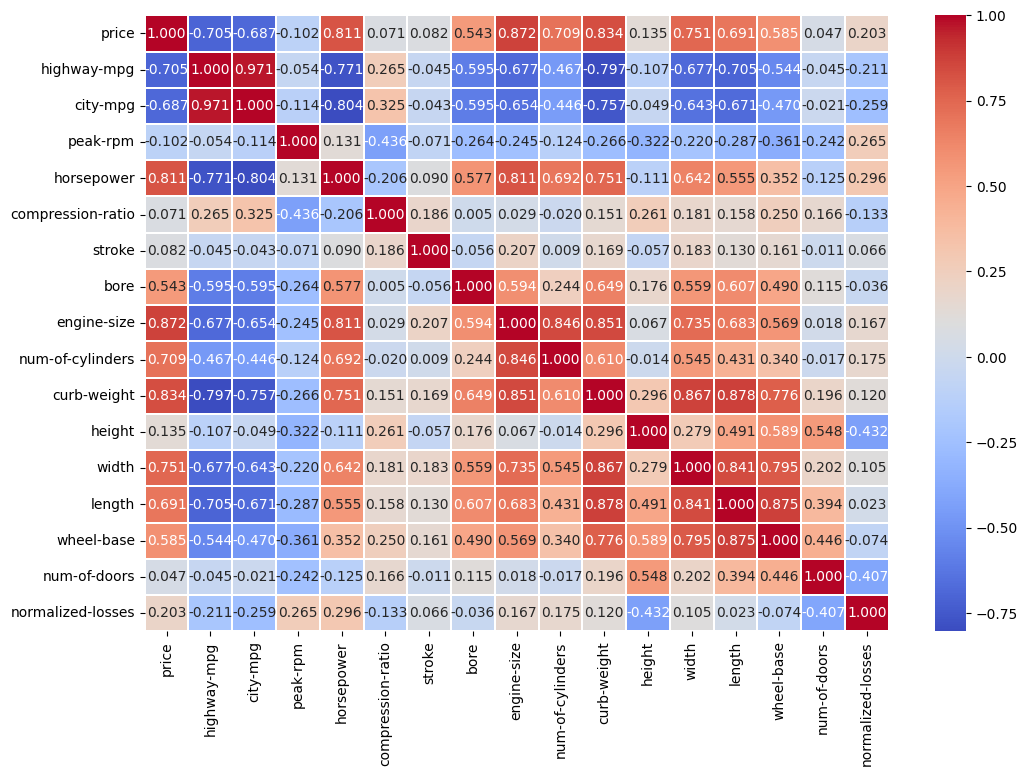

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

Density plots of numerical features

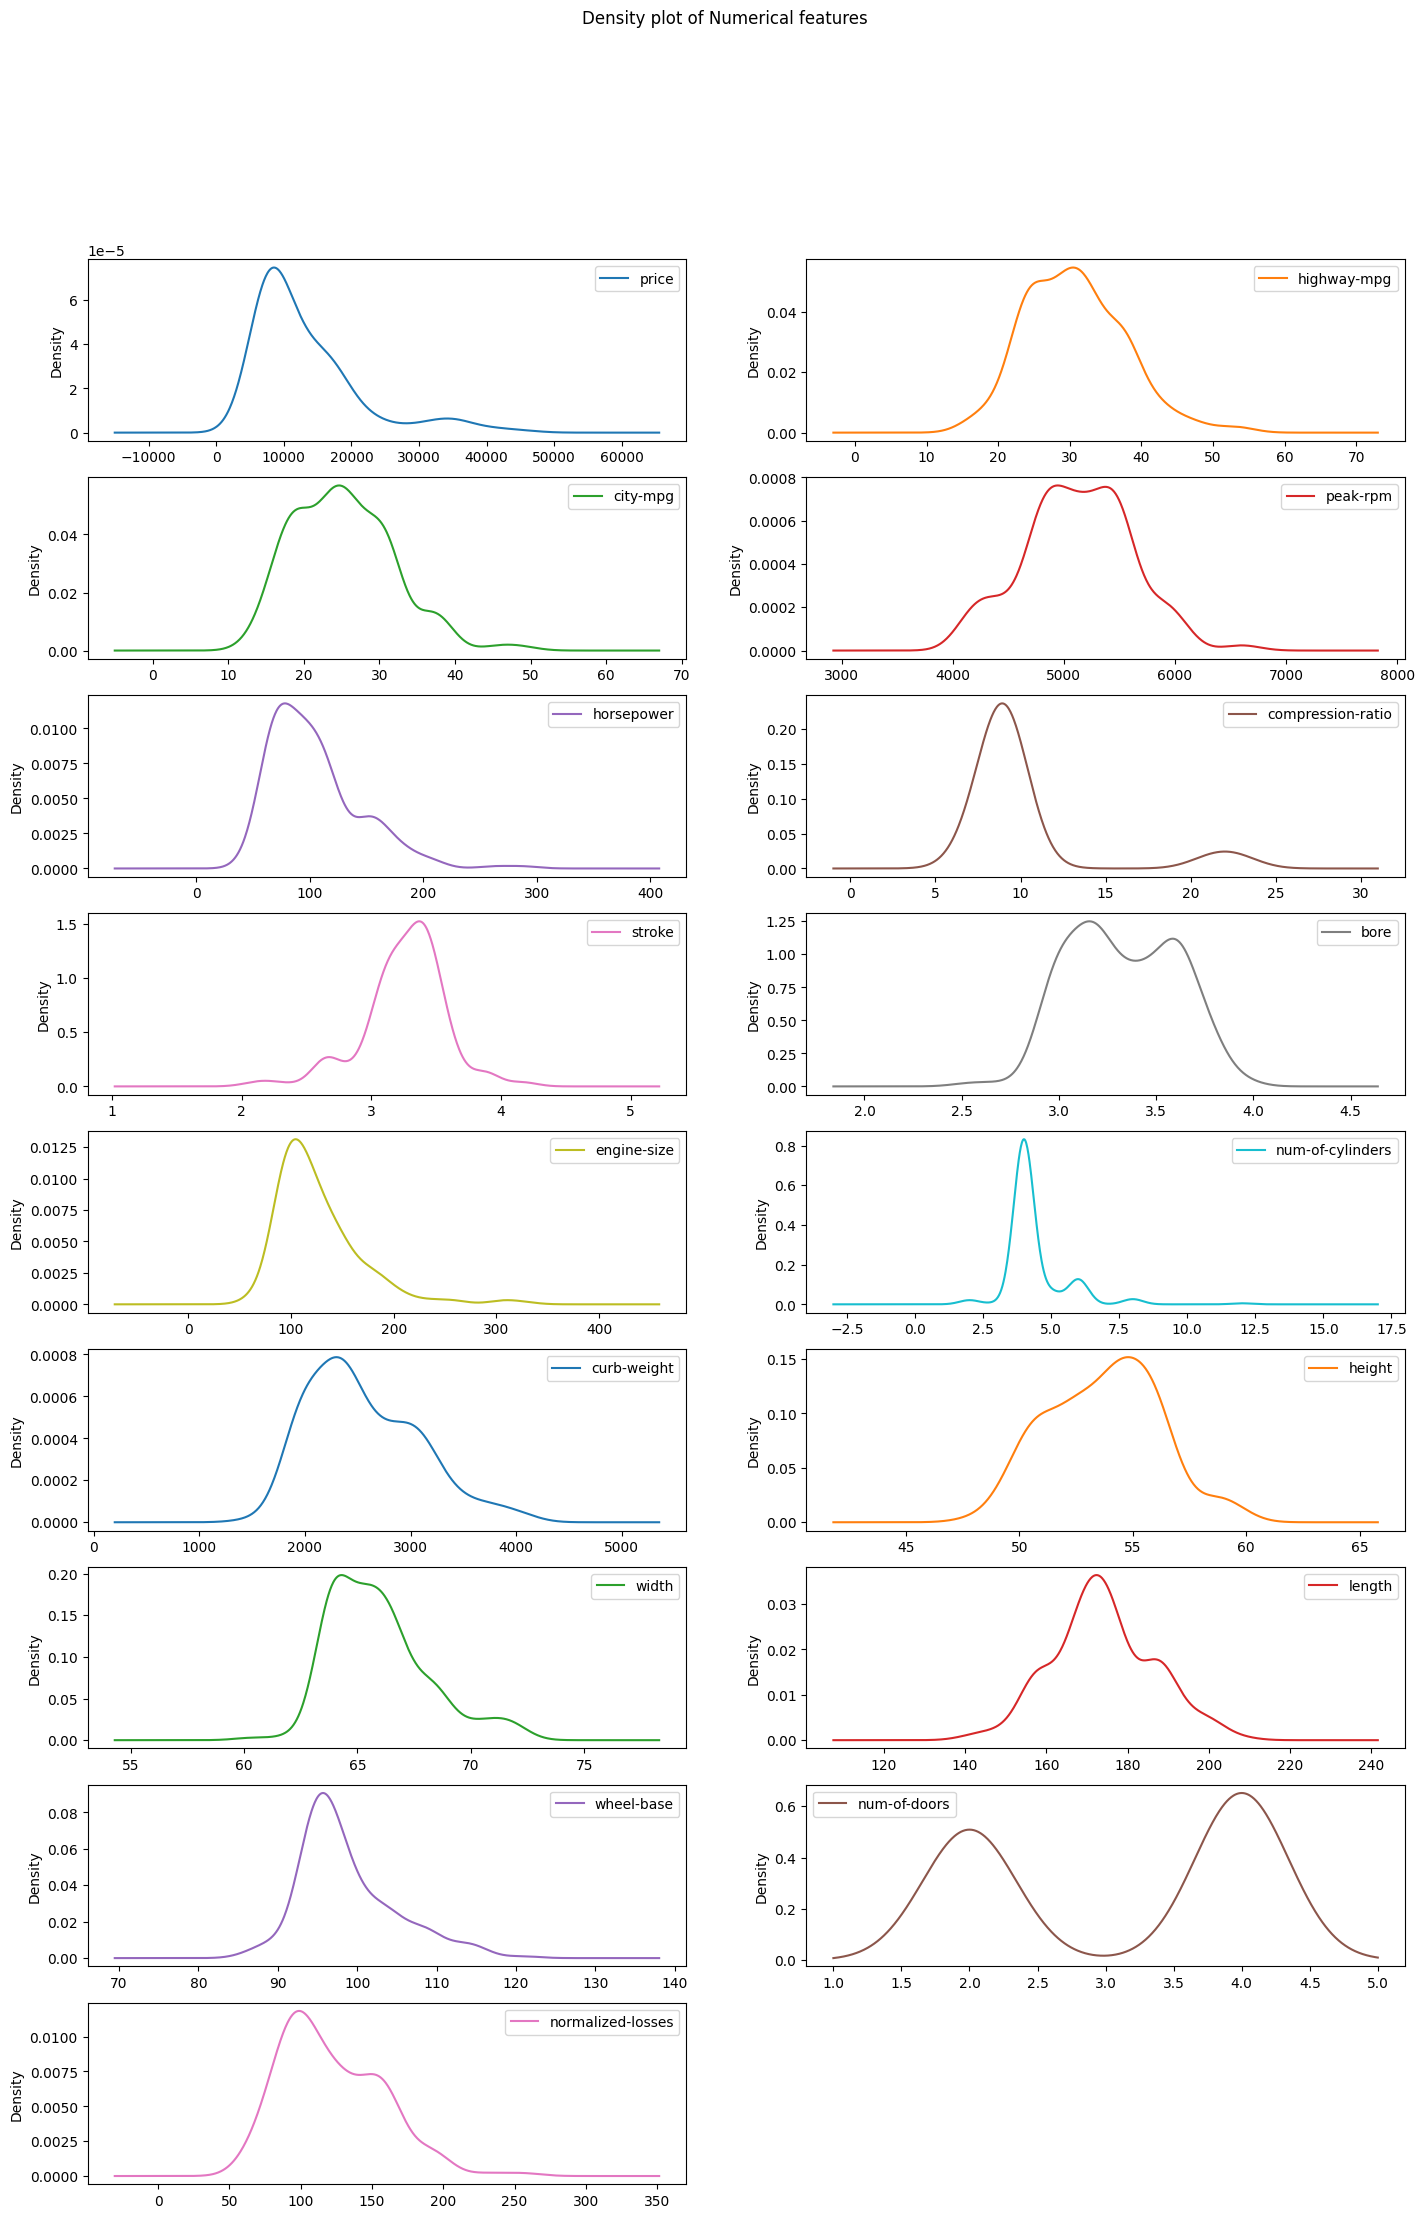

In [ ]:
numerical_data.plot(kind='density', figsize=(17, 25), subplots=True, layout=(9, 2), title="Density plot of Numerical features", sharex=False)
plt.show()

# Data Preprocessing

Drop duplicates

In [ ]:
data.drop_duplicates(inplace=True)

/tmp/ipython-input-2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


Handle missing values

In [ ]:
# Drop rows where 'price' is missing
data = data.dropna(subset=['price'])

# Replace missing values with mode
for col in ['peak-rpm', 'horsepower', 'num-of-doors', 'normalized-losses']:
  data[col] = data[col].fillna(data[col].mode()[0])

# Replace missing values with mean
for col in ['stroke', 'bore']:
  data[col] = data[col].fillna(data[col].mean())

# Verify that there are no more missing values in these columns
print(data[['price', 'peak-rpm', 'horsepower', 'num-of-doors', 'normalized-losses', 'stroke', 'bore']].isnull().sum())

price                0
peak-rpm             0
horsepower           0
num-of-doors         0
normalized-losses    0
stroke               0
bore                 0
dtype: int64


One Hot Encode Categorical data

In [ ]:
data = pd.get_dummies(data, columns=categorical_features)
display(data.head())

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,False,False,False,False,False,False,False,False,False,False
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,False,False,False,False,False,False,False,False,False,False
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,...,False,False,False,False,False,False,False,False,False,False
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,...,False,False,False,False,False,False,False,False,False,False
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,...,False,False,False,False,False,False,False,False,False,False


# Data Split and Transformation

Split between train and test sets

In [ ]:
# Separate features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 66)
Shape of X_test: (41, 66)
Shape of y_train: (160,)
Shape of y_test: (41,)


Feature scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [ ]:
models = {}
model_predictions = {}
model_probabilities = {}

Train

In [ ]:
# Initialize the models
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()
svm_regressor = SVR()

# Train the models
dt_regressor.fit(X_train_scaled, y_train)
rf_regressor.fit(X_train_scaled, y_train)
knn_regressor.fit(X_train_scaled, y_train)
svm_regressor.fit(X_train_scaled, y_train)

# Store the trained models
models['Decision Tree'] = dt_regressor
models['Random Forest'] = rf_regressor
models['KNN'] = knn_regressor
models['SVM'] = svm_regressor

print("Models trained successfully!")

Models trained successfully!


# Model Evaluation

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

evaluation_results = {}

for name, model in models.items():
  y_pred = model.predict(X_test_scaled)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)

  evaluation_results[name] = {
    'RMSE': rmse,
    'R2 Score': r2,
    'MAPE': mape
  }

for name, metrics in evaluation_results.items():
  print(f"--- {name} ---")
  print(f"RMSE: {metrics['RMSE']:.4f}")
  print(f"R2 Score: {metrics['R2 Score']:.4f}")
  print(f"MAPE: {metrics['MAPE']:.4f}%")
  print("-" * (len(name) + 6))

--- Decision Tree ---
RMSE: 2844.6545
R2 Score: 0.9339
MAPE: 10.9909%
-------------------
--- Random Forest ---
RMSE: 2720.7662
R2 Score: 0.9395
MAPE: 9.8057%
-------------------
--- KNN ---
RMSE: 6533.2159
R2 Score: 0.6511
MAPE: 18.2942%
---------
--- SVM ---
RMSE: 12216.4871
R2 Score: -0.2198
MAPE: 41.1640%
---------


Visualization of the Evaluation

/tmp/ipython-input-1546699806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evaluation_df.index, y='RMSE', data=evaluation_df, palette='viridis')


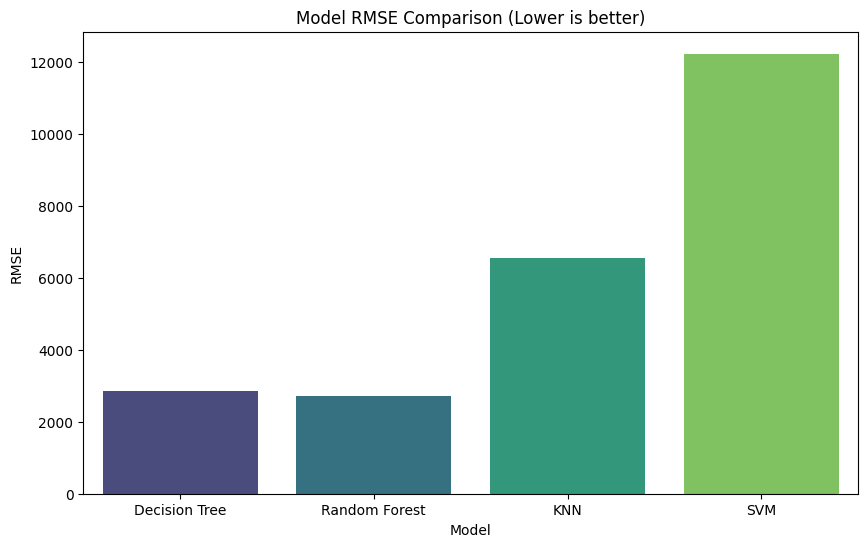

/tmp/ipython-input-1546699806.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evaluation_df.index, y='R2 Score', data=evaluation_df, palette='viridis')


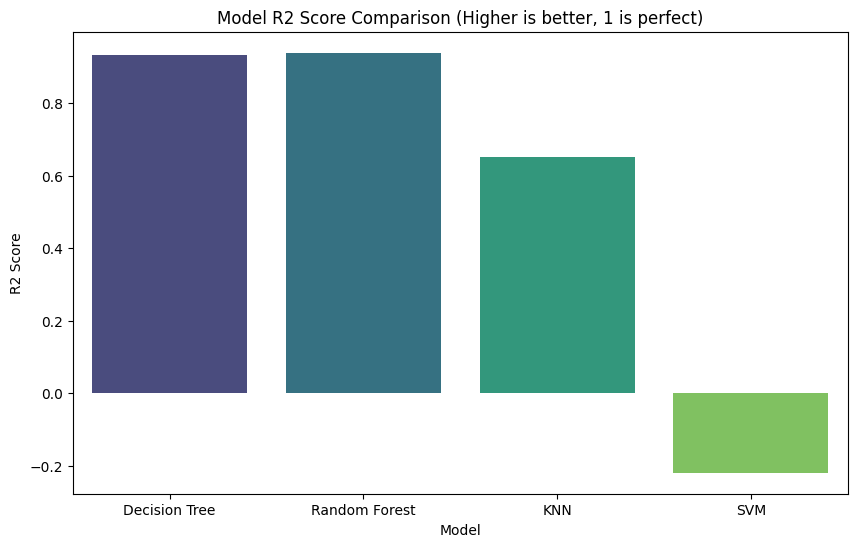

/tmp/ipython-input-1546699806.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evaluation_df.index, y='MAPE', data=evaluation_df, palette='viridis')


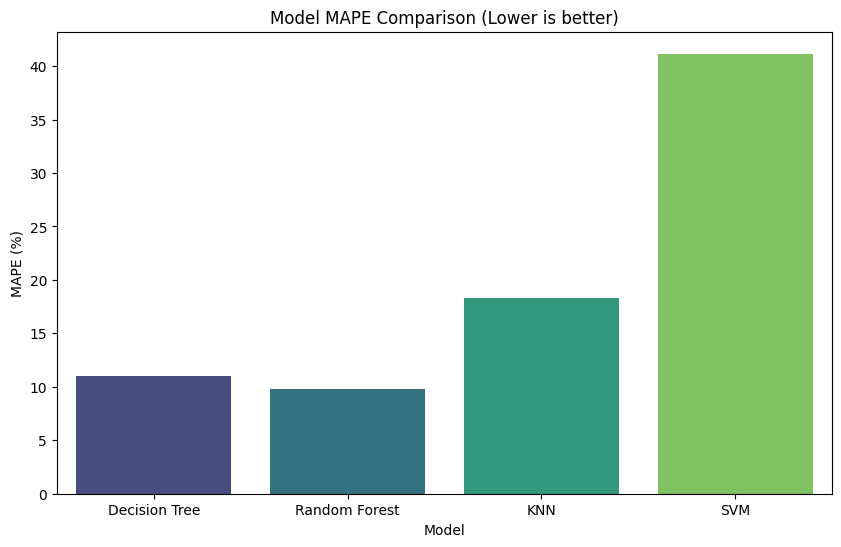

In [ ]:
# Convert the evaluation results to a pandas DataFrame for easier plotting
evaluation_df = pd.DataFrame(evaluation_results).T

# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=evaluation_df.index, y='RMSE', data=evaluation_df, palette='viridis')
plt.title('Model RMSE Comparison (Lower is better)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Plot R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x=evaluation_df.index, y='R2 Score', data=evaluation_df, palette='viridis')
plt.title('Model R2 Score Comparison (Higher is better, 1 is perfect)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

# Plot MAPE
plt.figure(figsize=(10, 6))
sns.barplot(x=evaluation_df.index, y='MAPE', data=evaluation_df, palette='viridis')
plt.title('Model MAPE Comparison (Lower is better)')
plt.xlabel('Model')
plt.ylabel('MAPE (%)')
plt.show()